In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 3.9MB/s 
     |████████████████████████████████| 6.5MB 24.4MB/s 
     |████████████████████████████████| 15.3MB 235kB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
crime_data=pd.read_csv('train.zip')

In [ ]:
weather_data = pd.read_csv("sf_weather.csv")

In [ ]:
football_data = pd.read_csv("49schedule.csv")

In [ ]:
baseball_data = pd.read_csv('SF Giant.csv')

In [ ]:
crimes_missing = pd.DataFrame(crime_data.isnull().mean()*100, columns=["Missing Values %"])
crimes_missing

,Missing Values %
Dates,0.0
Category,0.0
Descript,0.0
DayOfWeek,0.0
PdDistrict,0.0
Resolution,0.0
Address,0.0
X,0.0
Y,0.0


In [ ]:
crimes_original = crime_data.copy()
crimes_original["Dates"] = pd.to_datetime(crime_data["Dates"])
crimes_original.set_index(keys=crimes_original["Dates"], inplace=True)
crimes_original.drop(columns=["Dates"], inplace=True)

In [ ]:
crime_data.drop(columns=["Category", "Descript", "Resolution", "Address", "X", "Y"], inplace=True)

In [ ]:
crime_data["Dates"] = pd.to_datetime(crime_data["Dates"]).dt.date

In [ ]:
crime_data

,Dates,DayOfWeek,PdDistrict
0,2015-05-13,Wednesday,NORTHERN
1,2015-05-13,Wednesday,NORTHERN
2,2015-05-13,Wednesday,NORTHERN
3,2015-05-13,Wednesday,NORTHERN
4,2015-05-13,Wednesday,PARK
...,...,...,...
878044,2003-01-06,Monday,TARAVAL
878045,2003-01-06,Monday,INGLESIDE
878046,2003-01-06,Monday,SOUTHERN
878047,2003-01-06,Monday,SOUTHERN


In [ ]:
baseball_data

,Date,Result,Game Home
0,31-03-2003,W,0
1,01-04-2003,W,0
2,02-04-2003,W,0
3,04-04-2003,W,0
4,05-04-2003,W,0
...,...,...,...
1931,24-09-2014,L,0
1932,25-09-2014,W,1
1933,26-09-2014,L,1
1934,27-09-2014,W,1


In [ ]:
baseball_data["Dates"]=baseball_data['Date']

In [ ]:
baseball_data

,Date,Result,Game Home,Dates
0,31-03-2003,W,0,31-03-2003
1,01-04-2003,W,0,01-04-2003
2,02-04-2003,W,0,02-04-2003
3,04-04-2003,W,0,04-04-2003
4,05-04-2003,W,0,05-04-2003
...,...,...,...,...
1931,24-09-2014,L,0,24-09-2014
1932,25-09-2014,W,1,25-09-2014
1933,26-09-2014,L,1,26-09-2014
1934,27-09-2014,W,1,27-09-2014


In [ ]:
baseball_data

,Date,Result,Game Home,Dates
0,31-03-2003,W,0,31-03-2003
1,01-04-2003,W,0,01-04-2003
2,02-04-2003,W,0,02-04-2003
3,04-04-2003,W,0,04-04-2003
4,05-04-2003,W,0,05-04-2003
...,...,...,...,...
1931,24-09-2014,L,0,24-09-2014
1932,25-09-2014,W,1,25-09-2014
1933,26-09-2014,L,1,26-09-2014
1934,27-09-2014,W,1,27-09-2014


In [ ]:
baseball_data.drop(columns=["Date"],inplace=True)

In [ ]:
crime_data.head()

,Dates,DayOfWeek,PdDistrict
0,2015-05-13,Wednesday,NORTHERN
1,2015-05-13,Wednesday,NORTHERN
2,2015-05-13,Wednesday,NORTHERN
3,2015-05-13,Wednesday,NORTHERN
4,2015-05-13,Wednesday,PARK


In [ ]:
baseball_data.head()

,Result,Game Home,Dates
0,W,0,31-03-2003
1,W,0,01-04-2003
2,W,0,02-04-2003
3,W,0,04-04-2003
4,W,0,05-04-2003


In [ ]:
weather_missing = pd.DataFrame(weather_data.isnull().mean()*100, columns=["Missing Values %"])
weather_missing

,Missing Values %
date,0.0
avg_temp (celsius),0.0
precipitation (mm),0.0
wind_speed (km/h),0.0
visibility (km),0.0


In [ ]:
weather_data.dtypes

date                   object
avg_temp (celsius)      int64
precipitation (mm)     object
wind_speed (km/h)      object
visibility (km)       float64
dtype: object

In [ ]:
weather_data

,date,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km)
0,01-01-2003,9,0,3,15.0
1,02-01-2003,10,0,5,15.0
2,03-01-2003,10,0,5,15.0
3,04-01-2003,11,0,5,15.0
4,05-01-2003,11,0.25,5,6.0
...,...,...,...,...,...
4511,09-05-2015,15,0,19,45.0
4512,10-05-2015,14,0,21,47.0
4513,11-05-2015,14,0,36,66.0
4514,12-05-2015,14,0,38,69.0


In [ ]:
weather_data["Dates"] = pd.to_datetime(weather_data["date"],format="%d-%m-%Y").dt.date

In [ ]:
weather_data

,date,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),Dates
0,01-01-2003,9,0,3,15.0,2003-01-01
1,02-01-2003,10,0,5,15.0,2003-01-02
2,03-01-2003,10,0,5,15.0,2003-01-03
3,04-01-2003,11,0,5,15.0,2003-01-04
4,05-01-2003,11,0.25,5,6.0,2003-01-05
...,...,...,...,...,...,...
4511,09-05-2015,15,0,19,45.0,2015-05-09
4512,10-05-2015,14,0,21,47.0,2015-05-10
4513,11-05-2015,14,0,36,66.0,2015-05-11
4514,12-05-2015,14,0,38,69.0,2015-05-12


In [ ]:
weather_data.head()

,date,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),Dates
0,01-01-2003,9,0,3,15.0,2003-01-01
1,02-01-2003,10,0,5,15.0,2003-01-02
2,03-01-2003,10,0,5,15.0,2003-01-03
3,04-01-2003,11,0,5,15.0,2003-01-04
4,05-01-2003,11,0.25,5,6.0,2003-01-05


In [ ]:
crime_data.dtypes

Dates         object
DayOfWeek     object
PdDistrict    object
dtype: object

In [ ]:
crime_data.head()

,Dates,DayOfWeek,PdDistrict
0,2015-05-13,Wednesday,NORTHERN
1,2015-05-13,Wednesday,NORTHERN
2,2015-05-13,Wednesday,NORTHERN
3,2015-05-13,Wednesday,NORTHERN
4,2015-05-13,Wednesday,PARK


In [ ]:
weather_data.drop(columns=["date"], inplace=True)

In [ ]:
weather_data.head()

,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),Dates
0,9,0,3,15.0,2003-01-01
1,10,0,5,15.0,2003-01-02
2,10,0,5,15.0,2003-01-03
3,11,0,5,15.0,2003-01-04
4,11,0.25,5,6.0,2003-01-05


In [ ]:
# weather_original = weather_data.copy()
# weather_original["Dates"] = pd.to_datetime(weather_data["Dates"])
weather_original=weather_data.copy()
weather_original["Dates"] = pd.to_datetime(weather_data["Dates"])

weather_original.set_index(keys=weather_original["Dates"], inplace=True)
weather_original.drop(columns=["Dates"], inplace=True)

In [ ]:
weather_original

,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km)
Dates,,,,
2003-01-01,9,0,3,15.0
2003-01-02,10,0,5,15.0
2003-01-03,10,0,5,15.0
2003-01-04,11,0,5,15.0
2003-01-05,11,0.25,5,6.0
...,...,...,...,...
2015-05-09,15,0,19,45.0
2015-05-10,14,0,21,47.0
2015-05-11,14,0,36,66.0


In [ ]:
baseball_data

,Result,Game Home,Dates
0,W,0,31-03-2003
1,W,0,01-04-2003
2,W,0,02-04-2003
3,W,0,04-04-2003
4,W,0,05-04-2003
...,...,...,...
1931,L,0,24-09-2014
1932,W,1,25-09-2014
1933,L,1,26-09-2014
1934,W,1,27-09-2014


In [ ]:
football_missing = pd.DataFrame(football_data.isnull().mean()*100, columns=["Missing Values %"])
football_missing

,Missing Values %
Date,0.0
Output,0.0
Home,0.0


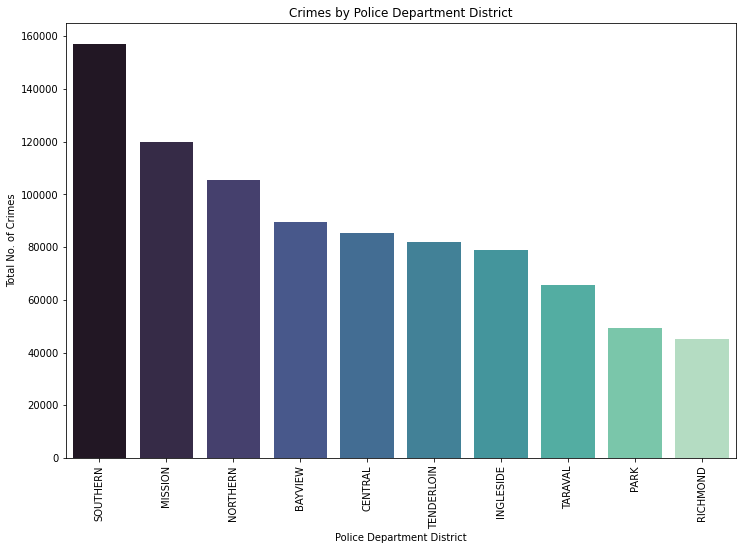

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="PdDistrict", data=crimes_original, order=crimes_original["PdDistrict"].value_counts().index,palette="mako")
plt.xlabel("Police Department District")
plt.ylabel("Total No. of Crimes")
plt.title("Crimes by Police Department District")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('mutkul_1.csv')
df

,BER,Channels
0,1.000000e-08,1
1,1.000000e-08,3
2,1.000000e-08,4
3,1.000000e-07,5
4,1.000000e-08,6
5,1.000000e-14,8
6,1.000000e-22,15
7,1.000000e-24,16
8,1.000000e-25,18
9,1.000000e-26,22


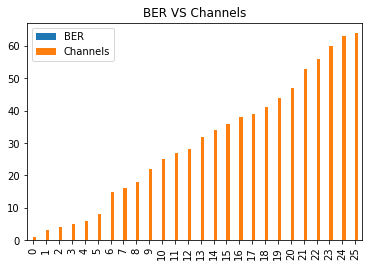

In [ ]:
df.plot.bar(title="BER VS Channels")


In [ ]:
football_data

,Date,Output,Home
0,"September 7, 2003",W,1.0
1,"September 14, 2003",L,0.0
2,"September 21, 2003",L,1.0
3,"September 28, 2003",L,0.0
4,"October 5, 2003",W,1.0
...,...,...,...
195,"November 27, 2014",L,1.0
196,"December 7, 2014",L,0.0
197,"December 14, 2014",L,0.0
198,"December 20, 2014",L,1.0


In [ ]:
football_data["Dates"] = pd.to_datetime(football_data["Date"])
football_data.drop(columns=["Date"], inplace=True)
football_data.rename(columns={"Output":"NFL_Output",
                 "Home":"NFL_Home"}, inplace=True)
football_data["NFL_Game_Day"] = 1

In [ ]:
football_data

,NFL_Output,NFL_Home,Dates,NFL_Game_Day
0,W,1.0,2003-09-07,1
1,L,0.0,2003-09-14,1
2,L,1.0,2003-09-21,1
3,L,0.0,2003-09-28,1
4,W,1.0,2003-10-05,1
...,...,...,...,...
195,L,1.0,2014-11-27,1
196,L,0.0,2014-12-07,1
197,L,0.0,2014-12-14,1
198,L,1.0,2014-12-20,1


In [ ]:
baseball_data.dtypes

Result       object
Game Home     int64
Dates        object
dtype: object

In [ ]:
baseball_data["Dates"] = pd.to_datetime(baseball_data["Dates"])

In [ ]:
baseball_data.rename(columns={"Result":"SFG_Output",
                 "Game Home":"SFG_Home"}, inplace=True)
baseball_data["SFG_Game_Day"] = 1

In [ ]:
baseball_data.dtypes

SFG_Output              object
SFG_Home                 int64
Dates           datetime64[ns]
SFG_Game_Day             int64
dtype: object

In [ ]:
final_data=pd.merge(crime_data,weather_data,how="left",on="Dates")

In [ ]:
final_data["Dates"]=pd.to_datetime(final_data["Dates"])

In [ ]:
final_data=pd.merge(final_data,baseball_data,how="left",on="Dates")

In [ ]:
final_data["Dates"]=pd.to_datetime(final_data["Dates"])

In [ ]:
final_data.dtypes

Dates                 datetime64[ns]
DayOfWeek                     object
PdDistrict                    object
avg_temp (celsius)             int64
precipitation (mm)            object
wind_speed (km/h)             object
visibility (km)              float64
SFG_Output                    object
SFG_Home                     float64
SFG_Game_Day                 float64
dtype: object

In [ ]:
final_data=pd.merge(final_data, football_data, how="left", on="Dates") #Added this line
final_data["Dates"] = pd.to_datetime(final_data["Dates"])
final_data.set_index(keys=final_data["Dates"], inplace=True)


In [ ]:
final_data.rename(columns={"avg_temp (celsius)":"avg_temp",
             "precipitation (mm)":"precipitation",
             "wind_speed (km/h)":"wind_speed",
             "visibility (km)":"visibility",
             
             }, inplace=True)

In [ ]:
final_data.head()

,Dates,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,SFG_Output,SFG_Home,SFG_Game_Day,NFL_Output,NFL_Home,NFL_Game_Day
Dates,,,,,,,,,,,,,
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,19,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,19,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,19,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,19,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-13,2015-05-13,Wednesday,PARK,15,0,19,40.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_data["precipitation"].replace({"T":np.nan}, inplace=True)
final_data["precipitation"] = final_data["precipitation"].astype("float")

In [ ]:
final_data["wind_speed"].replace({"Waning Crescent, 14":np.nan}, inplace=True)
final_data["wind_speed"] = final_data["wind_speed"].astype("float")

In [ ]:
final_data["NFL_Output"].fillna("No Game", inplace=True)
final_data["NFL_Home"].fillna(3, inplace=True) #3 Indicates no game for that day
final_data["NFL_Game_Day"].fillna(0, inplace=True)

In [ ]:
final_data["SFG_Output"].fillna("No Game",inplace=True)
final_data["SFG_Home"].fillna(3,inplace=True) #3 indicates no game for that day
final_data["SFG_Game_Day"].fillna(0,inplace=True)

In [ ]:
final_data.to_csv('final4.csv')

In [ ]:
final_data.dtypes

Dates            datetime64[ns]
DayOfWeek                object
PdDistrict               object
avg_temp                  int64
precipitation           float64
wind_speed              float64
visibility              float64
SFG_Output               object
SFG_Home                float64
SFG_Game_Day            float64
NFL_Output               object
NFL_Home                 object
NFL_Game_Day            float64
dtype: object

In [ ]:
final_data["NFL_Home"].replace({"0": 0,
                          "1":1,
                          "0.0":0,
                          "1.0":1}, inplace=True)

In [ ]:
final_data["SFG_Home"] = final_data["SFG_Home"].astype("int")
final_data["SFG_Game_Day"] = final_data["SFG_Game_Day"].astype("int")

In [ ]:
final_data["NFL_Game_Day"] = final_data["NFL_Game_Day"].astype("int")

In [ ]:
import seaborn as sns

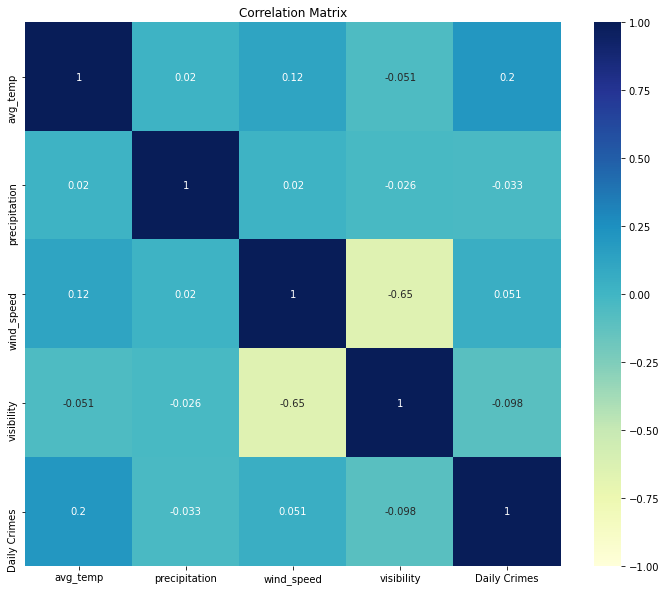

In [ ]:
plt.figure(figsize=(12,10))
crimes_weather = final_data.resample("D").agg({"avg_temp":"mean", "precipitation":"mean", "wind_speed":"mean", "visibility":"mean", "PdDistrict":"count"}).dropna()
crimes_weather.rename(columns={"PdDistrict":"Daily Crimes"}, inplace=True)
sns.heatmap(crimes_weather.corr(), annot=True, vmin=-1, vmax=1,cmap="YlGnBu" )
plt.title("Correlation Matrix")
plt.show()

In [ ]:
final_data

,Dates,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,SFG_Output,SFG_Home,SFG_Game_Day,NFL_Output,NFL_Home,NFL_Game_Day
Dates,,,,,,,,,,,,,
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0,No Game,3,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0,No Game,3,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0,No Game,3,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0,No Game,3,0
2015-05-13,2015-05-13,Wednesday,PARK,15,0.0,19.0,40.0,No Game,3,0,No Game,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-01-06,2003-01-06,Monday,TARAVAL,14,0.0,13.0,16.0,W,1,1,No Game,3,0
2003-01-06,2003-01-06,Monday,INGLESIDE,14,0.0,13.0,16.0,W,1,1,No Game,3,0
2003-01-06,2003-01-06,Monday,SOUTHERN,14,0.0,13.0,16.0,W,1,1,No Game,3,0


In [ ]:
import seaborn as sns

In [ ]:
final_data.dtypes

Dates            datetime64[ns]
DayOfWeek                object
PdDistrict               object
avg_temp                  int64
precipitation           float64
wind_speed              float64
visibility              float64
SFG_Output               object
SFG_Home                  int64
SFG_Game_Day              int64
NFL_Output               object
NFL_Home                  int64
NFL_Game_Day              int64
dtype: object

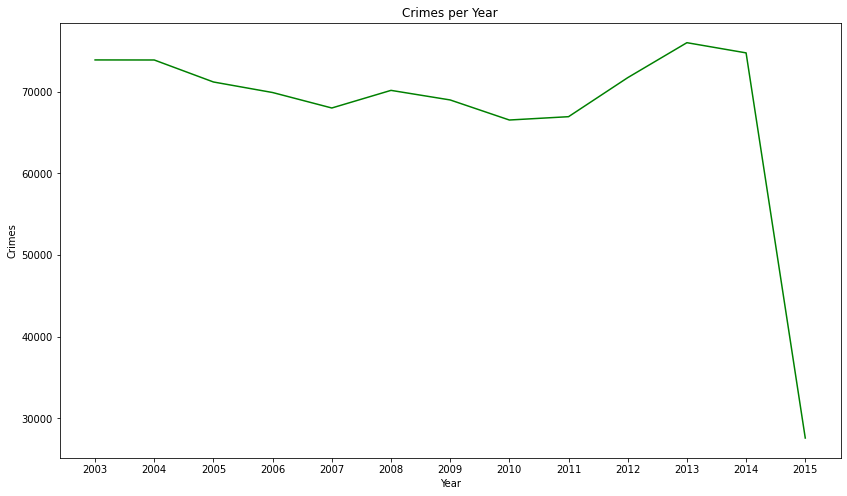

In [ ]:
plt.figure(figsize=(14,8))
yearly_crimes = final_data["DayOfWeek"].resample("Y").count()
years = [x for x in range(2003, 2016)]
sns.lineplot(x=years, y=yearly_crimes.values,color="green")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(years, years)
plt.title("Crimes per Year")
plt.show()

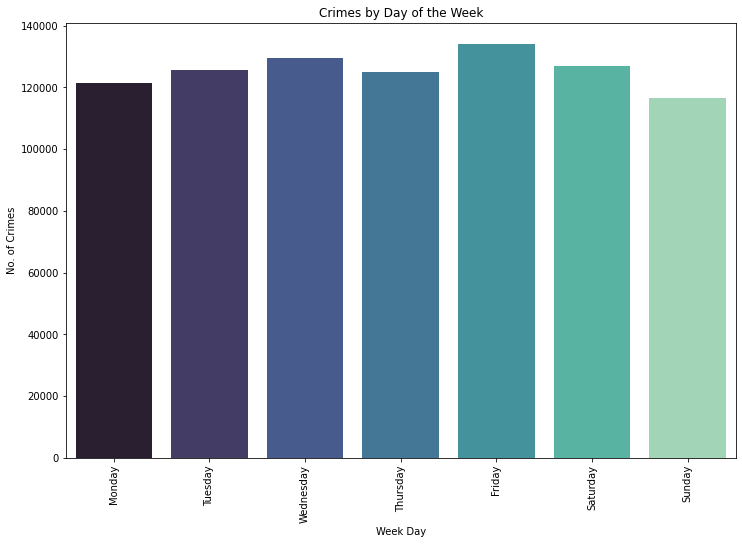

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="DayOfWeek", data=final_data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],palette="mako")
plt.title("Crimes by Day of the Week")
plt.xlabel("Week Day")
plt.ylabel("No. of Crimes")
plt.xticks(rotation=90)
plt.show()

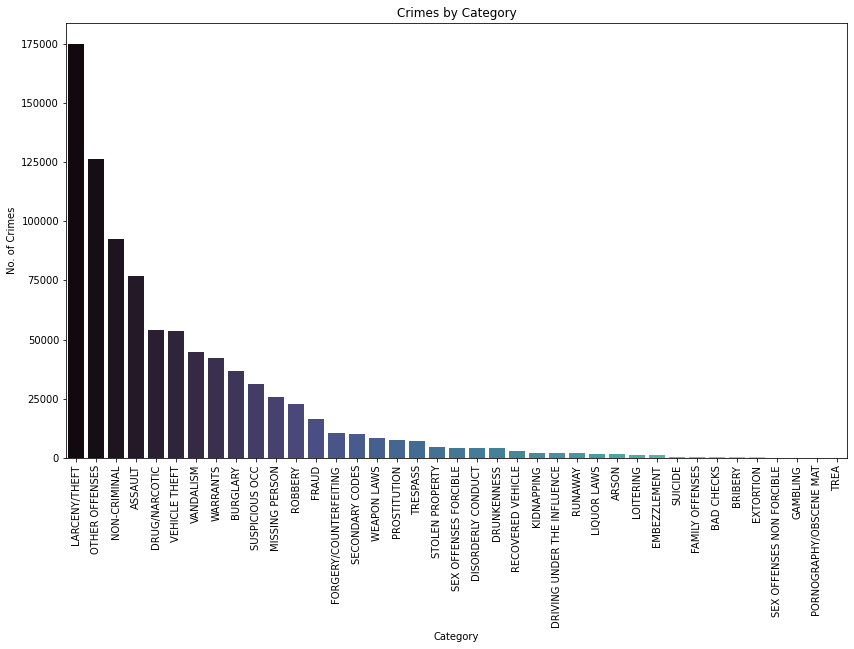

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x="Category", data=crimes_original, order=crimes_original["Category"].value_counts().index,palette="mako")
plt.title("Crimes by Category")
plt.ylabel("No. of Crimes")
plt.xticks(rotation=90)
plt.show()

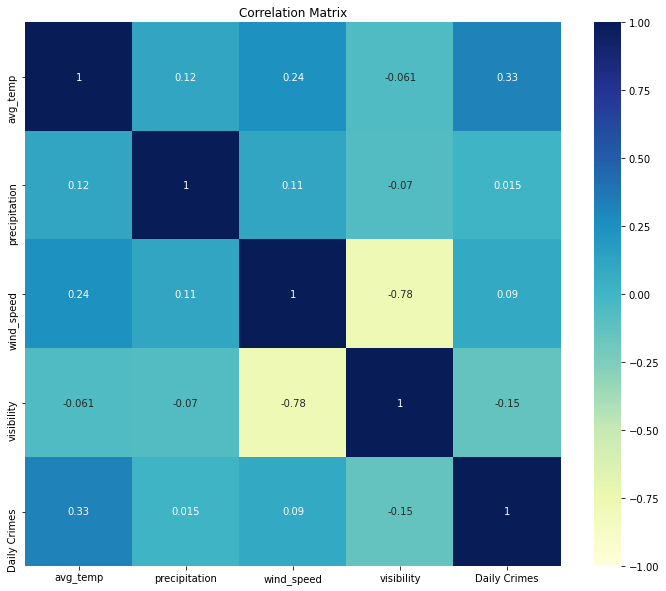

In [ ]:
plt.figure(figsize=(12,10))
crimes_weather = final_data.resample("W").agg({"avg_temp":"mean", "precipitation":"mean", "wind_speed":"mean", "visibility":"mean", "PdDistrict":"count"}).dropna()
crimes_weather.rename(columns={"PdDistrict":"Daily Crimes"}, inplace=True)
sns.heatmap(crimes_weather.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

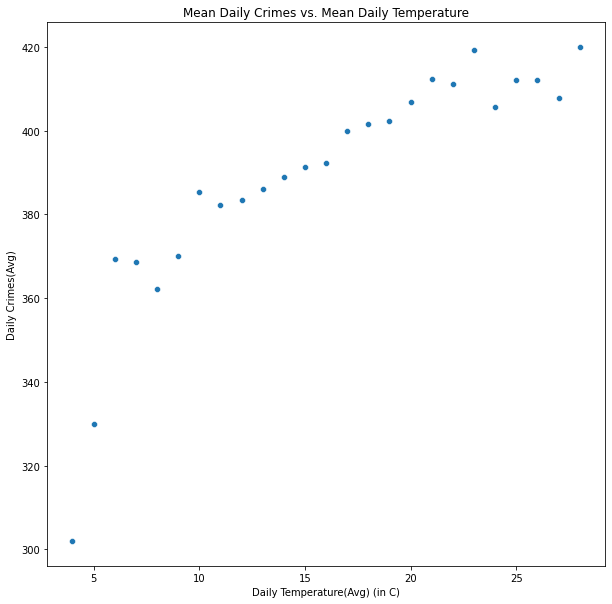

In [ ]:
plt.figure(figsize=(10,10))
crimes_weather = final_data.resample("D").agg({"avg_temp":"mean", "PdDistrict":"count"}).dropna().groupby(by="avg_temp").mean()
sns.scatterplot(x=crimes_weather.index, y=crimes_weather["PdDistrict"],palette="")
plt.title("Mean Daily Crimes vs. Mean Daily Temperature")
plt.ylabel("Daily Crimes(Avg)")
plt.xlabel("Daily Temperature(Avg) (in C)")
plt.show()

In [ ]:
data_sfg = final_data.copy()
data_home = data_sfg[data_sfg["SFG_Home"].astype("int") == 1]
data_away = data_sfg[data_sfg["SFG_Home"]==0]

In [ ]:
data_home_mean = data_home.resample("D").agg({"PdDistrict":"count"}).dropna().mean()
data_home_mean

PdDistrict    46.291552
dtype: float64

In [ ]:
data_away_mean = data_away.resample("D").agg({"PdDistrict":"count"}).dropna().mean()
data_away_mean

PdDistrict    43.792075
dtype: float64

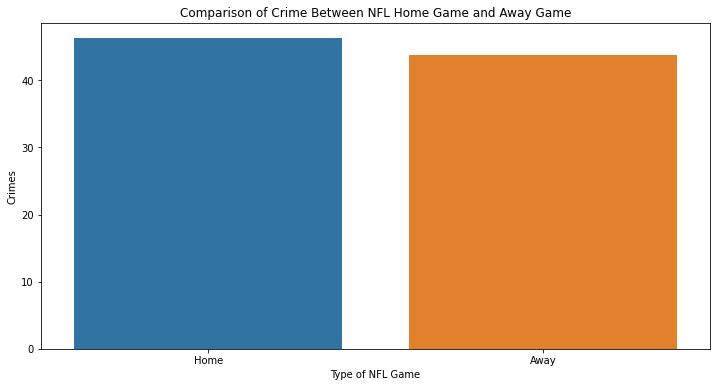

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=["Home", "Away"], y=[data_home_mean[0], data_away_mean[0]])
plt.title("Comparison of Crime Between NFL Home Game and Away Game")
plt.ylabel("Crimes")
plt.xlabel("Type of NFL Game")
plt.show()

In [ ]:
data_dom = final_data.copy()
data_dom["Day"] = data_dom.index.day
data_dom = data_dom.resample("D").agg({"Day":"mean", "PdDistrict":"count"}).dropna().groupby(by="Day").mean()

In [ ]:
avg_line = data_dom["PdDistrict"].mean()

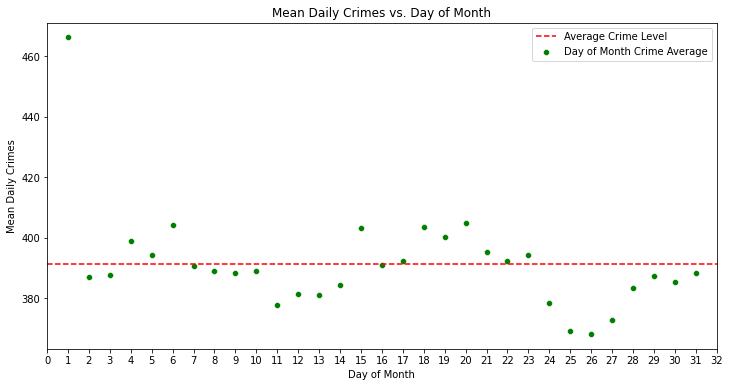

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data_dom.index, y=data_dom["PdDistrict"],color="green")
plt.title("Mean Daily Crimes vs. Day of Month")
plt.ylabel("Mean Daily Crimes")
plt.xlabel("Day of Month")
plt.xlim((1,31))
plt.xticks(ticks=[x for x in range(0, 33)])
plt.axhline(avg_line, ls='--', color="red")
plt.legend(["Average Crime Level", "Day of Month Crime Average"])
plt.show()

In [ ]:
data_nfl = final_data.copy()
data_game_day = data_nfl[data_nfl["NFL_Game_Day"].astype("int") == 1]
data_regular_day = data_nfl[data_nfl["NFL_Game_Day"]==0]

In [ ]:
# data_sfg = final_data.copy()
# data_game_day = data_sfg[data_sfg["SFG_Game_Day"].astype("int") == 1]
# data_regular_day = data_sfg[data_sfg["SFG_Game_Day"]==0]


In [ ]:
data_nfl.dtypes

Dates            datetime64[ns]
DayOfWeek                object
PdDistrict               object
avg_temp                  int64
precipitation           float64
wind_speed              float64
visibility              float64
SFG_Output               object
SFG_Home                  int64
SFG_Game_Day              int64
NFL_Output               object
NFL_Home                  int64
NFL_Game_Day              int64
dtype: object

In [ ]:
data_game_day_mean = data_game_day.resample("D").agg({"PdDistrict":"count"}).dropna().mean()
data_game_day_mean

PdDistrict    9.425321
dtype: float64

In [ ]:
data_regular_day_mean = data_regular_day.resample("D").agg({"PdDistrict":"count"}).dropna().mean()
data_regular_day_mean

PdDistrict    186.3773
dtype: float64

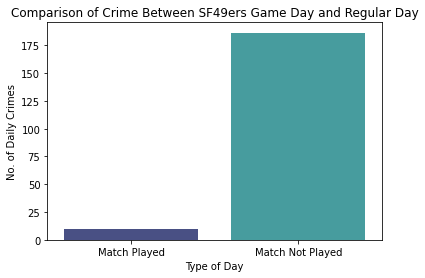

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x=["Match Played", "Match Not Played"], y=[data_game_day_mean[0], data_regular_day_mean[0]],palette="mako")
plt.title("Comparison of Crime Between SF49ers Game Day and Regular Day")
plt.ylabel("No. of Daily Crimes")
plt.xlabel("Type of Day")
plt.show()

In [ ]:
print(data_regular_day_mean[0])

186.3772999334959


In [ ]:
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
X=["Game day","Non Game Day"]


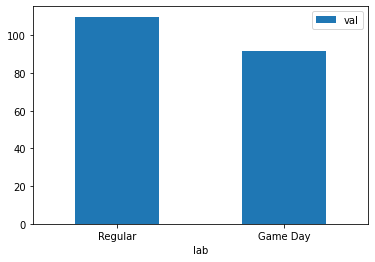

In [ ]:
df = pd.DataFrame({'lab':['Regular', 'Game Day'], 'val':[109.9102, 91.526]})
df.plot.bar(x='lab', y='val', rot=0)
plt.show()

In [ ]:
data_sfg = final_data.copy()
data_home = data_sfg[data_sfg["SFG_Home"].astype("int") == 1]
data_away = data_sfg[data_sfg["SFG_Home"]==0]

In [ ]:
data_sfg = final_data.copy()
data_game_win = data_sfg[data_sfg["SFG_Output"] == "W"]
data_game_loss = data_sfg[data_sfg["SFG_Output"] == "L"]

In [ ]:
data_game_win_mean = data_game_win.resample("D").agg({"PdDistrict":"count"}).dropna().mean()

In [ ]:
data_game_loss_mean = data_game_loss.resample("D").agg({"PdDistrict":"count"}).dropna().mean()


In [ ]:
data_game_win_mean


PdDistrict    45.182966
dtype: float64

In [ ]:
data_game_loss_mean


PdDistrict    44.267632
dtype: float64

In [ ]:
final_data.dtypes

Dates            datetime64[ns]
DayOfWeek                object
PdDistrict               object
avg_temp                  int64
precipitation           float64
wind_speed              float64
visibility              float64
SFG_Output               object
SFG_Home                  int64
SFG_Game_Day              int64
NFL_Output               object
NFL_Home                  int64
NFL_Game_Day              int64
dtype: object

In [ ]:
output = final_data.drop(columns=["precipitation", "wind_speed", "visibility", "NFL_Output", "NFL_Home","SFG_Output","SFG_Home"])

In [ ]:
output

,Dates,DayOfWeek,PdDistrict,avg_temp,SFG_Game_Day,NFL_Game_Day
Dates,,,,,,
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,0
2015-05-13,2015-05-13,Wednesday,NORTHERN,15,0,0
2015-05-13,2015-05-13,Wednesday,PARK,15,0,0
...,...,...,...,...,...,...
2003-01-06,2003-01-06,Monday,TARAVAL,14,1,0
2003-01-06,2003-01-06,Monday,INGLESIDE,14,1,0
2003-01-06,2003-01-06,Monday,SOUTHERN,14,1,0


In [ ]:
output = output.groupby([pd.Grouper(freq="1D"), "PdDistrict"]).agg({"DayOfWeek":"first", "PdDistrict":"count", "avg_temp":"mean", "SFG_Game_Day":"first","NFL_Game_Day":"first"}).dropna()

In [ ]:
output.rename(columns={"PdDistrict":"Crimes"}, inplace=True)
output["Day"] = output.index.get_level_values(0).day
output["Month"] = output.index.get_level_values(0).month
output["Year"] = output.index.get_level_values(0).year

In [ ]:
output.to_csv("clean_data.csv")

In [ ]:
!pip install xgboost==0.90

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
import warnings 

warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("clean_data.csv")

In [ ]:
data.drop(columns=["Dates"], inplace=True)

In [ ]:
data

,PdDistrict,DayOfWeek,Crimes,avg_temp,SFG_Game_Day,NFL_Game_Day,Day,Month,Year
0,BAYVIEW,Monday,50,14,1,0,6,1,2003
1,CENTRAL,Monday,32,14,1,0,6,1,2003
2,INGLESIDE,Monday,26,14,1,0,6,1,2003
3,MISSION,Monday,62,14,1,0,6,1,2003
4,NORTHERN,Monday,52,14,1,0,6,1,2003
...,...,...,...,...,...,...,...,...,...
22476,PARK,Wednesday,21,15,0,0,13,5,2015
22477,RICHMOND,Wednesday,19,15,0,0,13,5,2015
22478,SOUTHERN,Wednesday,49,15,0,0,13,5,2015
22479,TARAVAL,Wednesday,26,15,0,0,13,5,2015


In [ ]:
data=pd.get_dummies(data,columns=["DayOfWeek","PdDistrict","NFL_Game_Day","SFG_Game_Day"])

In [ ]:
data

,Crimes,avg_temp,Day,Month,Year,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,NFL_Game_Day_0,NFL_Game_Day_1,SFG_Game_Day_0,SFG_Game_Day_1
0,50,14,6,1,2003,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,32,14,6,1,2003,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,26,14,6,1,2003,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,62,14,6,1,2003,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,52,14,6,1,2003,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,21,15,13,5,2015,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
22477,19,15,13,5,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
22478,49,15,13,5,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
22479,26,15,13,5,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
X = data.drop(columns=["Crimes"])
y = data["Crimes"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
parameters = {"learning_rate"    : [0.30 ],
              "max_depth"        : [ 5],
              "min_child_weight" : [ 3 ],
              "gamma"            : [ 0.2 ],
              "colsample_bytree" : [  0.8 ],
              }

In [ ]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
reg.score(X_test,y_test)

0.6997335529338133

In [ ]:
%%time
xgb = GridSearchCV(XGBRegressor(), param_grid=parameters)
xgb.fit(X_train, y_train)

[04:18:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.33 s, sys: 55.2 ms, total: 8.39 s
Wall time: 8.4 s


In [ ]:
xgb.score(X_train, y_train)

0.7849616777293495

In [ ]:
xgb.score(X_test, y_test)

0.7266127398042836

In [ ]:
import pickle

In [ ]:
best_pars = xgb.best_params_
best_model = xgb.best_estimator_
pickle.dump(xgb.best_estimator_, open("xgb_model.pickle", "wb"))